# Malware Classification
Preprocessing of the malware classification dataset provided on Kaggle by Microsoft

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
DIR = '~/workspace/datasets/'
DIR_TRAIN = os.path.expanduser(DIR + 'train/')
train_data_csv = pd.read_csv(DIR+'trainLabels.csv')

In [3]:
train_data_csv.head()

Id  Class
0  01kcPWA9K2BOxQeS5Rju      1
1  04EjIdbPV5e1XroFOpiN      1
2  05EeG39MTRrI6VY21DPd      1
3  05rJTUWYAKNegBk2wE8X      1
4  0AnoOZDNbPXIr2MRBSCJ      1

In [4]:
# Get how many classes there are
classes = train_data_csv['Class'].unique()

In [5]:
# Create hashmap with the classes as keys and the index as values
# 1 -> Ramnit, 2-> Lolipop, 3-> Kelihos_ver3, 4-> Vundo, 5-> Simda, 6-> Tracur, 7-> Kelihos_ver1, 8-> Obfuscator.ACY, 9-> Gatak
class_names = ['Ramnit', 'Lolipop', 'Kelihos_ver3', 'Vundo', 'Simda', 'Tracur', 'Kelihos_ver1', 'Obfuscator.ACY', 'Gatak']
# Start from 1
class_to_index = dict(zip(range(1,10),class_names))

In [6]:
class_to_index

{1: 'Ramnit',
 2: 'Lolipop',
 3: 'Kelihos_ver3',
 4: 'Vundo',
 5: 'Simda',
 6: 'Tracur',
 7: 'Kelihos_ver1',
 8: 'Obfuscator.ACY',
 9: 'Gatak'}

In [7]:
# Add a column with the name of the class
train_data_csv['ClassName'] = train_data_csv['Class'].map(class_to_index)
train_data_csv.head()

Id  Class ClassName
0  01kcPWA9K2BOxQeS5Rju      1    Ramnit
1  04EjIdbPV5e1XroFOpiN      1    Ramnit
2  05EeG39MTRrI6VY21DPd      1    Ramnit
3  05rJTUWYAKNegBk2wE8X      1    Ramnit
4  0AnoOZDNbPXIr2MRBSCJ      1    Ramnit

In [8]:
# See how many samples there are for each class using the name
train_data_csv['ClassName'].value_counts()

Kelihos_ver3      2942
Lolipop           2478
Ramnit            1541
Obfuscator.ACY    1228
Gatak             1013
Tracur             751
Vundo              475
Kelihos_ver1       398
Simda               42
Name: ClassName, dtype: int64

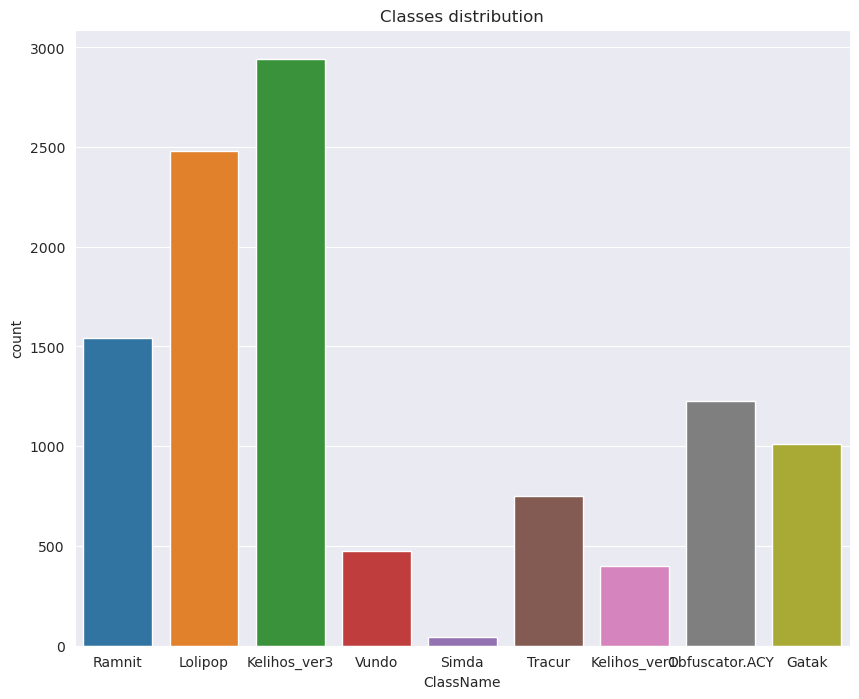

In [9]:
# Plot the distribution of the classes
import seaborn as sns
import matplotlib.pyplot as plt
# Plot size 10x10
plt.figure(figsize=(10,8))
sns.countplot(x='ClassName', data=train_data_csv)
plt.title('Classes distribution')
plt.show()

In [10]:
# Drop the undersampled classes
threshold = 1000
train_data_csv = train_data_csv.groupby('ClassName').filter(lambda x: len(x) > threshold)

In [11]:
train_data_csv['ClassName'].value_counts()

Kelihos_ver3      2942
Lolipop           2478
Ramnit            1541
Obfuscator.ACY    1228
Gatak             1013
Name: ClassName, dtype: int64

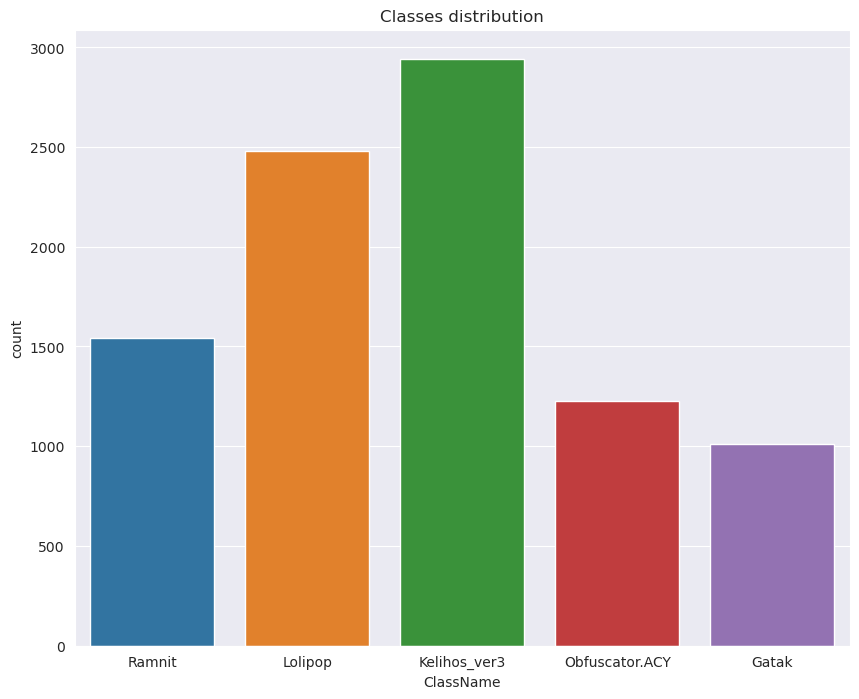

In [12]:
# Plot the new distribution of the classes
plt.figure(figsize=(10,8))
sns.countplot(x='ClassName', data=train_data_csv)
plt.title('Classes distribution')
plt.show()

# Preprocessing
In this part we take every file in the dataset and convert it to an image.

The byte files have the address of the executable in the first column. The address is not needed so we remove it. We create the folder based on the malware family.
Because of the high number of files we will use multiprocessing to speed up the process.

In [13]:
# Iterate through the training data folder
# and get the file names
import os

train_files = os.listdir(DIR_TRAIN)
# Make a folder for each class
for c in class_names:
    print('Creating folder for the class: ' + c)
    # Create a folder for each class
    # If the folder exists pass
    if os.path.exists(os.path.join(DIR_TRAIN, c)):
        print("Folder exists: " + c)
    else:
        os.mkdir(os.path.join(DIR_TRAIN, c))
        print("Folder created: " + c)
        # Change to the index of the class
        idx = class_names.index(c) + 1
        # Move the files to the corresponding folder
        for f in train_data_csv[train_data_csv['Class'] == idx]['Id']:
            filename = f + '.bytes'
            # Move the file
            os.rename(os.path.join(DIR_TRAIN, filename), os.path.join(DIR_TRAIN, c, filename))

Creating folder for the class: Ramnit
Folder exists: Ramnit
Creating folder for the class: Lolipop
Folder exists: Lolipop
Creating folder for the class: Kelihos_ver3
Folder exists: Kelihos_ver3
Creating folder for the class: Vundo
Folder exists: Vundo
Creating folder for the class: Simda
Folder exists: Simda
Creating folder for the class: Tracur
Folder exists: Tracur
Creating folder for the class: Kelihos_ver1
Folder exists: Kelihos_ver1
Creating folder for the class: Obfuscator.ACY
Folder exists: Obfuscator.ACY
Creating folder for the class: Gatak
Folder exists: Gatak


Class: Simda
File: 1IpWLz6eyhVxDAfQMKEd.bytes
---------------------


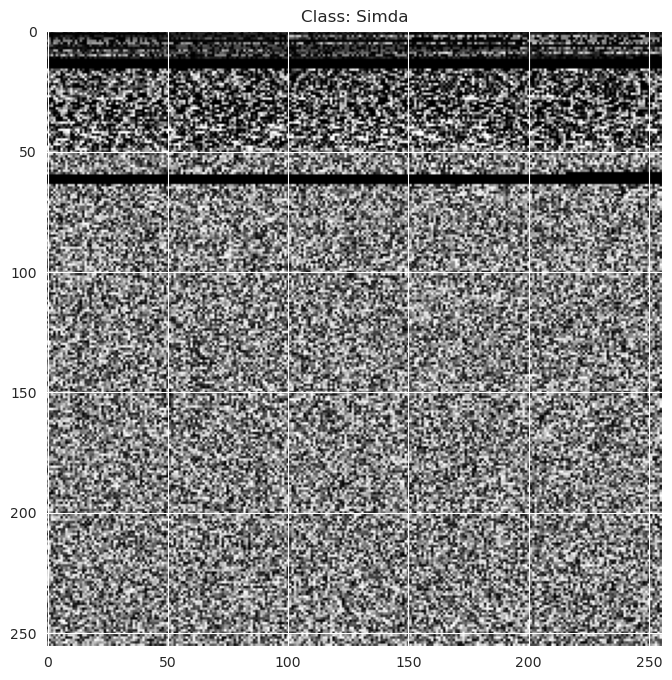

In [14]:
# Read a file from each directory and display it
import random
# Get a random class
random_class = random.choice(class_names)
# Get a random file from the class
random_file = random.choice(os.listdir(os.path.join(DIR_TRAIN, random_class)))

# Print the class and the file
print('Class: ' + random_class)
print('File: ' + random_file)

# Read the file and print the 10 first lines
with open(os.path.join(DIR_TRAIN, random_class, random_file)) as f:
    # Print in a nice format
    IMG_H = 256
    IMG_W = 256
    SIZE = IMG_H * IMG_W
    f = f.read().splitlines()
    #print('\n'.join(f))
    # Remove the first column from the file
    # The first column is the address
    # The address is not needed
    print("---------------------")
    f = [i.split()[1:] for i in f]
    file_processed = [' '.join(i) for i in f]
    #print('\n'.join(file_processed))
    # Change the ?? to 00
    # The ?? are the bytes that are not present
    # The ?? are not needed
    file_processed = [i.replace('??', '00') for i in file_processed]

    # The file will be converted to a image
    # Each pixel will be a byte
    # The image will be grayscale
    # The image will be saved as a numpy array
    # It has hexadecimal values
    # Convert the hexadecimal values to decimal
    # Read each line of the file
    # Read each word of the line
    img_file = []
    for line in file_processed:
        for word in line.split():
            # Convert the hexadecimal value to decimal
            img_file.append(int(word, 16))
    # Convert the list to numpy array
    img_file = np.array(img_file[:SIZE])
    # Make it a matrix to fit the shape of the img_file.shape
    img_file = img_file.reshape(IMG_H, IMG_W)
    # Reshape the array to fit the image
    plt.figure(figsize=(10,8))
    plt.imshow(img_file, cmap='gray')
    plt.title('Class: ' + random_class)
    plt.show()

In [15]:
def preprocess_file2img(file:str,d:str,IMG_H:int,IMG_W:int)->None:
    SIZE = IMG_H * IMG_W
    print(f"Processing file: {file} in directory {d}",flush=True)
    with open(os.path.join(DIR_TRAIN, d, file)) as f:
        f = f.read().splitlines()
        #print('\n'.join(f))
        # Remove the first column from the file
        # The first column is the address
        # The address is not needed
        #print("PROCESSING FILE2IMG --------------------->",f)
        f = [i.split()[1:] for i in f]
        file_processed = [' '.join(i) for i in f]
        #print('\n'.join(file_processed))
        # Change the ?? to 00
        # The ?? are the bytes that are not present
        # The ?? are not needed
        file_processed = [i.replace('??', '00') for i in file_processed]

        # The file will be converted to a image
        # Each pixel will be a byte
        # The image will be grayscale
        # The image will be saved as a numpy array
        # It has hexadecimal values
        # Convert the hexadecimal values to decimal
        # Read each line of the file
        # Read each word of the line
        img_file = []
        for line in file_processed:
            for word in line.split():
                # Convert the hexadecimal value to decimal
                img_file.append(int(word, 16))
        # If img_file is smaller than SIZE padding with 0
        if len(img_file) < SIZE:
            img_file.extend([0] * (SIZE - len(img_file)))
        # Convert the list to numpy array
        img_file = np.array(img_file[:SIZE])
        # Make it a matrix to fit the shape of the img_file.shape
        img_file = img_file.reshape(IMG_H, IMG_W)

        plt.imsave(os.path.join(DIR_HERE, 'train_imgs',d, file + '.png'), img_file, cmap='gray')

In [16]:
# Create dir train if it does not exist
DIR_HERE = os.path.expanduser(DIR)
if os.path.exists(os.path.join(DIR_HERE, 'train_imgs')):
    print("Folder exists: train")
else:
    os.mkdir(os.path.join(DIR_HERE, 'train_imgs'))
    print("Folder created: train")

Folder created: train


In [17]:
# Crete a folder for each class
for c in class_names:
    if os.path.exists(os.path.join(DIR_HERE, 'train_imgs', c)):
        print("Folder exists: " + c)
    else:
        os.mkdir(os.path.join(DIR_HERE, 'train_imgs', c))
        print("Folder created: " + c)

Folder created: Ramnit
Folder created: Lolipop
Folder created: Kelihos_ver3
Folder created: Vundo
Folder created: Simda
Folder created: Tracur
Folder created: Kelihos_ver1
Folder created: Obfuscator.ACY
Folder created: Gatak


In [18]:
# Get the list of files in the train folder
dirs = os.listdir(DIR_TRAIN)
print(dirs,flush=True)
# Create a folder for each class
print(DIR_TRAIN,flush=True)

['Lolipop', 'Simda', 'Tracur', 'Obfuscator.ACY', 'Vundo', 'Ramnit', 'Gatak', 'Kelihos_ver3', 'Kelihos_ver1']
/home/sebnae/workspace/datasets/train/


In [19]:
# Process each file
IMG_H = 256
IMG_W = 256
for d in dirs:
    print("Processing directory: " + d,flush=True)
    # Get the list of files in the directory
    files = os.listdir(os.path.join(DIR_TRAIN, d))
    # Process each file
    for file in files:
        print("Processing file: " + file,flush=True)
        preprocess_file2img(file,d,IMG_H,IMG_W)
        break
print("Done",flush=True)

Processing directory: Lolipop
Processing file: EV5qiMnPCxDZIRgmwk0b.bytes
Processing file: EV5qiMnPCxDZIRgmwk0b.bytes in directory Lolipop
Processing directory: Simda
Processing file: asKPnzUXjShMc0Tl6Wge.bytes
Processing file: asKPnzUXjShMc0Tl6Wge.bytes in directory Simda
Processing directory: Tracur
Processing file: gXHK1mV3DGIftCOyrk5h.bytes
Processing file: gXHK1mV3DGIftCOyrk5h.bytes in directory Tracur
Processing directory: Obfuscator.ACY
Processing file: 1QTsYc7DZ2VxmfJFUXhN.bytes
Processing file: 1QTsYc7DZ2VxmfJFUXhN.bytes in directory Obfuscator.ACY
Processing directory: Vundo
Processing file: 8a3GEC7cPKtx0lI6qYvL.bytes
Processing file: 8a3GEC7cPKtx0lI6qYvL.bytes in directory Vundo
Processing directory: Ramnit
Processing file: fEdiGX7rSmvUhQ0MFne5.bytes
Processing file: fEdiGX7rSmvUhQ0MFne5.bytes in directory Ramnit
Processing directory: Gatak
Processing file: 9S0BkrXNCxIEbgq4HGc3.bytes
Processing file: 9S0BkrXNCxIEbgq4HGc3.bytes in directory Gatak
Processing directory: Kelihos

In [21]:
import multiprocessing as mp
from functools import partial

pool = mp.Pool(processes=mp.cpu_count())

for d in dirs:
    print("Processing directory: " + d,flush=True)
    # Get the list of files in the directory
    files = os.listdir(os.path.join(DIR_TRAIN, d))

    partial_preprocess_file2img = partial(preprocess_file2img,d=d,IMG_H=IMG_H,IMG_W=IMG_W)
    pool.map(partial_preprocess_file2img,files)
pool.close()
pool.join()
print("Done",flush=True)

Processing directory: Lolipop
Processing file: c4G3LY2M7yWAEDmQHgVr.bytes in directory LolipopProcessing file: 369xrHyDKegPqFMYWQJu.bytes in directory LolipopProcessing file: 1XKY6TxM2eICFymS4AsN.bytes in directory LolipopProcessing file: iH1NpT5djnMa64tzV0yP.bytes in directory LolipopProcessing file: CVNHj8u3ZfAQOelMq5r4.bytes in directory LolipopProcessing file: EV5qiMnPCxDZIRgmwk0b.bytes in directory LolipopProcessing file: 8VqGnuDHlr1jRNZ9da5C.bytes in directory LolipopProcessing file: GWbiQstavLpfhYqDE8O0.bytes in directory LolipopProcessing file: d603ro8OlAQxKC9wGib1.bytes in directory Lolipop
Processing file: 4ODnoUH5ets62Nal1yVx.bytes in directory LolipopProcessing file: fBRjLOxWbPyreYn4hvkU.bytes in directory Lolipop

Processing file: 2sHzcQk5T1UExobShRmF.bytes in directory LolipopProcessing file: If7D6pQO5xPYckjg41LB.bytes in directory LolipopProcessing file: eDEd50XhAoyv8CHpnO2R.bytes in directory Lolipop


Processing file: f82n1geuSzmKDjZwRQts.bytes in directory Lolipop





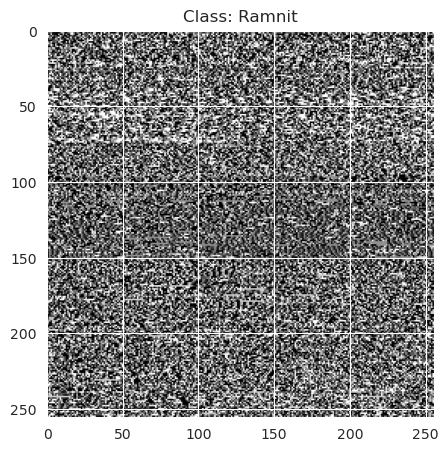

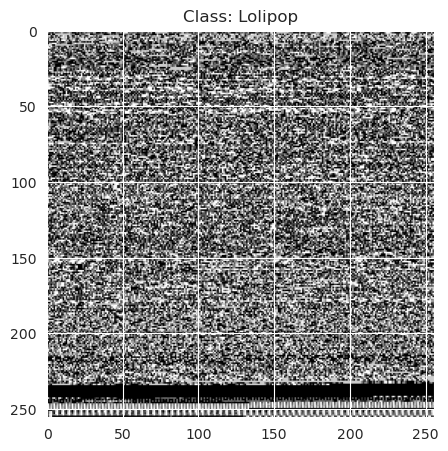

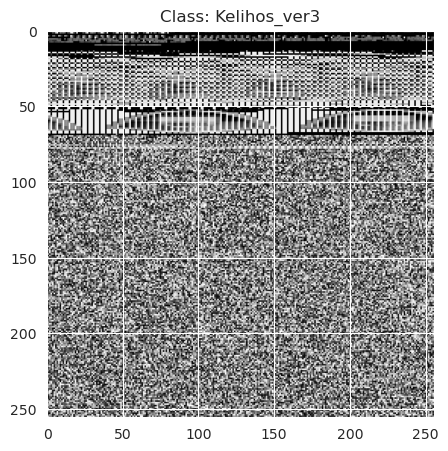

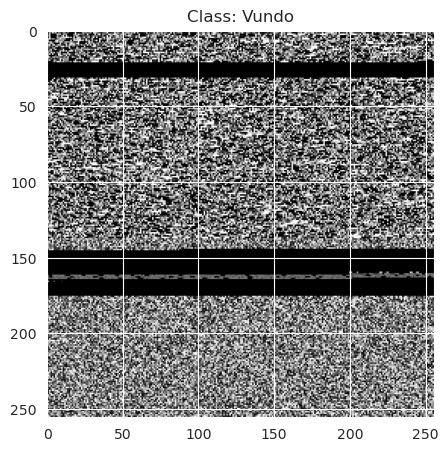

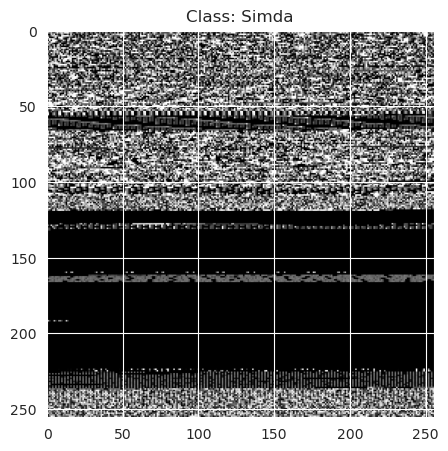

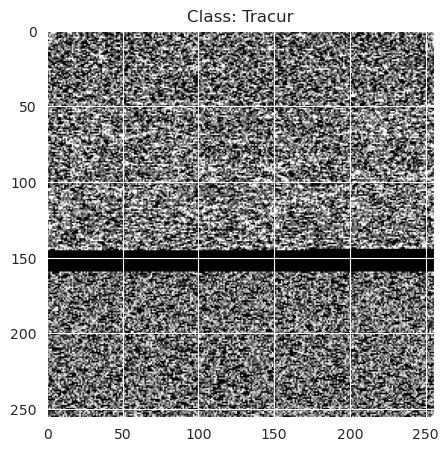

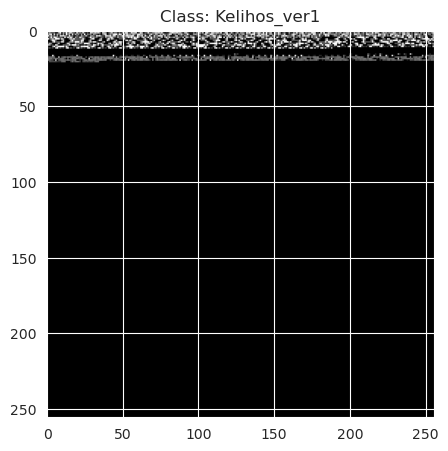

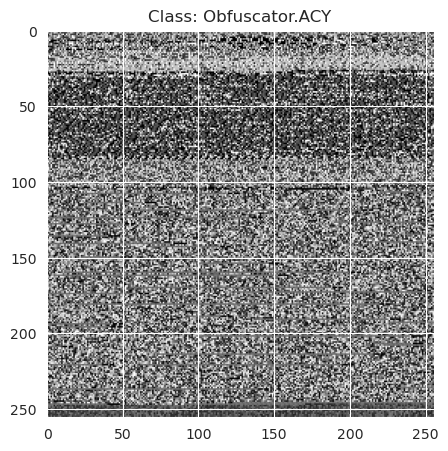

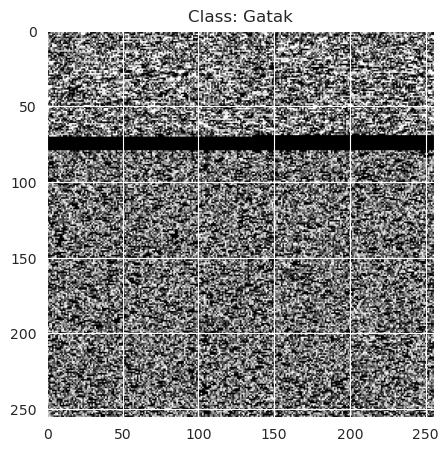

In [23]:
# Show a image from each class in a grid
for c in class_names:
    # Get the list of files in the directory
    files = os.listdir(os.path.join(DIR_HERE, 'train_imgs', c))
    # Get a random file
    random_file = random.choice(files)
    # Read the file
    img = plt.imread(os.path.join(DIR_HERE, 'train_imgs', c, random_file))
    # Plot the image
    plt.figure(figsize=(5,8))
    plt.imshow(img, cmap='gray')
    plt.title('Class: ' + c)
    plt.show()

# Color Mapping of the data
If we want to have even more data stored into the image we can use the color mapping of the image.

Class: Kelihos_ver3
File: jUDRevNaIGil1Tp7SOks.bytes
---------------------


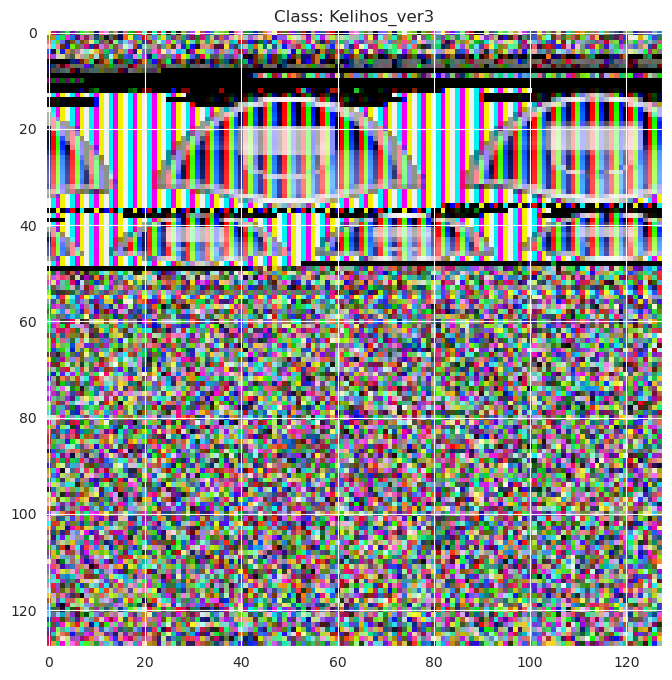

In [31]:
# Read a file from each directory and display it
import random
# Get a random class
class_idx = 2
class_name = class_names[class_idx]
# Get a random file from the class
random_file = random.choice(os.listdir(os.path.join(DIR_TRAIN, class_name)))

# Print the class and the file
print('Class: ' + class_name)
print('File: ' + random_file)

# Read the file and print the 10 first lines
with open(os.path.join(DIR_TRAIN, class_name, random_file)) as f:
    # Print in a nice format
    IMG_H = 128
    IMG_W = IMG_H
    SIZE = IMG_H * IMG_W
    f = f.read().splitlines()
    #print('\n'.join(f))
    # Remove the first column from the file
    # The first column is the address
    # The address is not needed
    print("---------------------")
    f = [i.split()[1:] for i in f]
    file_processed = [' '.join(i) for i in f]
    #print('\n'.join(file_processed))
    # Change the ?? to 00
    # The ?? are the bytes that are not present
    # The ?? are not needed
    file_processed = [i.replace('??', '00') for i in file_processed]

    # The file will be converted to a image
    # Each pixel will be a byte
    # The image will be grayscale
    # The image will be saved as a numpy array
    # It has hexadecimal values
    # Convert the hexadecimal values to decimal
    # Read each line of the file
    # Read each word of the line
    img_file = []
    for line in file_processed:
        for word in line.split():
            # Convert the hexadecimal value to decimal
            img_file.append(int(word, 16))
    # Convert the list to numpy array
    img_file = np.array(img_file[:SIZE*3])
    # Make it a matrix to fit the shape of the img_file.shape
    img_file = img_file.reshape(IMG_H, IMG_W,3)
    # Reshape the array to fit the image
    plt.figure(figsize=(10,8))
    plt.imshow(img_file)
    plt.title('Class: ' + class_name)
    plt.show()